<a id="ref4"></a>
# Convolution applied on images

In [1]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg

In [ ]:
# Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
### Load image of your choice on the notebook
print("name of your test image. Default: bird.jpg")
raw= raw_input()
im = Image.open(raw) 
# uses the ITU-R 601-2 Luma transform (there are several 
# ways to convert an image to grey scale)
image_gr = im.convert("L")    
print("\n Original type: %r \n\n" % image_gr)
# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
%matplotlib inline
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

name of your test image. Default: bird.jpg


In [ ]:
# Now, we will experiment using an edge detector kernel.
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 
grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline
print('GRADIENT MAGNITUDE - Feature map')
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

GRADIENT MAGNITUDE - Feature map


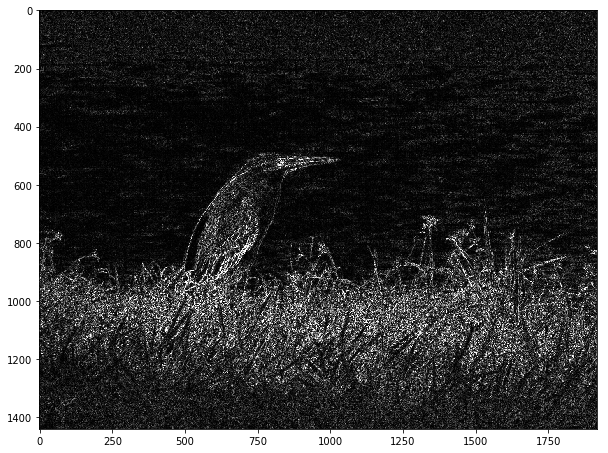

In [7]:
type(grad)
grad_biases = np.absolute(grad) + 100
grad_biases[grad_biases > 255] = 255
%matplotlib inline
print('GRADIENT MAGNITUDE - Feature map')
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

## MNIST

In [1]:
import tensorflow as tf
tf.__version__
from tensorflow.examples.tutorials.mnist import input_data
# The One-hot = True argument: in contrast to Binary representation, the labels will 
# be presented in a way that only one bit will be on for a specific digit
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
s = tf.InteractiveSession()
# It's best to create placeholders before variable assignments when using TensorFlow.
x  = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
# Weight tensor
W = tf.Variable(tf.zeros([784,10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))
s.run(tf.initialize_all_variable())
# add weights and biases to the inputs
tf.matmul(x,W) + b
y = tf.nn.softmax(tf.matmul(x,W) + b)
# cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

ModuleNotFoundError: No module named 'tensorflow'

In practice, Batch Gradient Descent is not often used because is too computationally expensive. The good part about this method is that you have the true gradient, but with the expensive computing task of using the whole dataset in one time. Due to this problem, Neural Networks usually use minibatch to train.

In [3]:
# Load 50 training examples for each training iteration
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict = {x: batch[0], y_: batch[1]})
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))    
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
acc = accuaracy.eval(feed_dict = {x: mnist.test.images,y_: mnist.test.labels})*100
print("The final accuracy for the simple ANN model: {} % ".format(acc))
s.close() #finish the session

NameError: name 'mnist' is not defined